In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
import matplotlib.image as mpimg

In [2]:
alpha = 0.01
beta = 0.5
m = 150
n = 80
tol = 0.001
np.random.seed(605)

In [3]:
f_calcs = []
t_calcs = []
x = np.zeros(n)
A = np.random.randn(m, n)

for i in range(1, 1000):
    f_x = -1*np.sum(np.log(1 - np.dot(A, x))) - np.sum(np.log(1 + x)) - np.sum(np.log(1 - x))

    f_calcs.append(f_x)
    d = 1 / (1 - np.dot(A, x))
    gradient  = np.dot(A.T, d) - 1 / (1 + x) + 1 / (1 - x)
    f_prime = np.dot(gradient.T, -gradient)
    grad_norm = np.linalg.norm(gradient)

    if (grad_norm < tol):
        break

    t = 1


    while (np.max(np.dot(A, (x + t * -gradient))) >= 1) or (np.max(np.abs(x + t * -gradient)) >= 1):
        t *= beta
    
    while (-np.sum(np.log(1 - np.dot(A, (x + t * -gradient)))) - np.sum(np.log(1 - (x + t * -gradient) ** 2)) > f_x + alpha * t * f_prime):
        t *= beta
    
    t_calcs.append(t)
    x = x + t * -gradient
    

optimal = f_calcs[-1]

In [4]:
x = range(len(f_calcs) - 1)
y = f_calcs[:-1] - optimal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


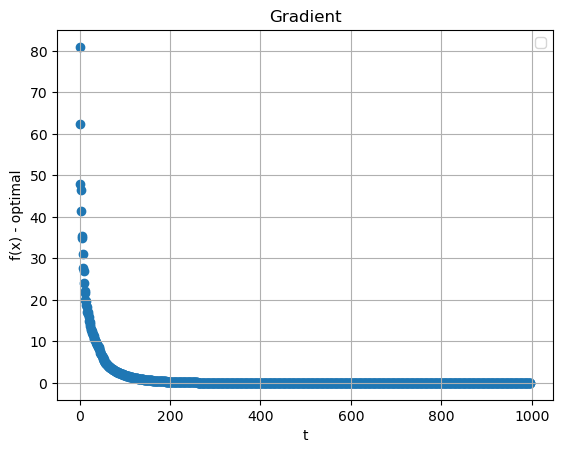

In [5]:
plt.scatter(x, y)
plt.xlabel('t')
plt.ylabel('f(x) - optimal')
plt.title('Gradient')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
print(optimal)

-80.93229137892978


In [7]:
##Newtonian Method
f_calcs = []
t_calcs = []
x = np.zeros(n)
A = np.random.randn(m, n)
tol = 1e-8

for i in range(1, 1000):
    f_x = -1*np.sum(np.log(1 - np.dot(A, x))) - np.sum(np.log(1 + x)) - np.sum(np.log(1 - x))

    f_calcs.append(f_x)
    d = 1 / (1 - np.dot(A, x))
    gradient  = np.dot(A.T, d) - 1 / (1 + x) + 1 / (1 - x)
    hessian = np.dot(A.T, np.dot(np.diag(d**2), A)) + np.diag(1 / (1 + x)**2 + 1 / (1 - x)**2)

    solved_value = -np.linalg.solve(hessian, gradient)

    f_prime = np.dot(gradient.T, solved_value)

    if (np.abs(f_prime) < tol):
        break

    t = 1

    while (np.max(np.dot(A, (x + t * solved_value))) >= 1) or (np.max(np.abs(x + t * solved_value)) >= 1):
        t *= beta
    
    while (-np.sum(np.log(1 - np.dot(A, (x + t * solved_value)))) - np.sum(np.log(1 - (x + t * solved_value) ** 2)) > f_x + alpha * t * f_prime):
        t *= beta
    
    t_calcs.append(t)
    x = x + t * solved_value
    

optimal = f_calcs[-1]

In [8]:
print(optimal)

-72.6757412185013


In [9]:
x = range(len(f_calcs) - 1)
y = f_calcs[:-1] - optimal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


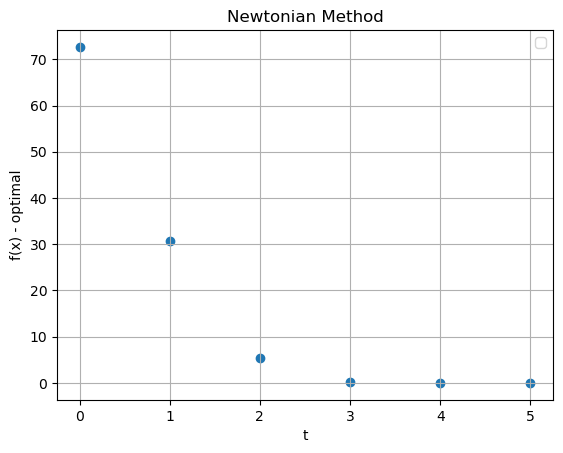

In [10]:
plt.scatter(x, y)
plt.xlabel('t')
plt.ylabel('f(x) - optimal')
plt.title('Newtonian Method')
plt.legend()
plt.grid(True)
plt.show()